# 1. Alista el dataset
Con el dataset AHAH, completa los pasos necesarios para realizar el Análisis Exploratorio de Datos Espaciales (AEDE) de la autocorrelación espacial:
- Comprueba que no se tengan "islas"
- Crea la matriz de pesos espaciales
- Estandariza la matris
- Crea la versión estandarizada del valor AHAH
- Crea el rezago espacial del valor AHAH

# 2. Autocorrelación espacial global
- Visualiza el valor principal AHAH con un gráfico de Moran
- Calcula la I. de Moran
- ¿Qué conclusiones puedes obtener a partir del grafico y dle valor de la I. de Moran? ¿ Cuál es el patrón espacial general?

# 3. Autocorrelación espacial local

- Calcula los estadiísticos LISa para las áreas LSOA
- Realiza un mapa de clusters significantes al 5%
- ¿Puedes indentificar hosposts o coldspots? Si es así, ¿Qué significan? ¿Qué pasa con los outliers espaciales?
- Crea un mapa de clusters con niveles de significancia del 1% y 10%; comparalos entre entre ellos. ¿Cuáles son los principales cambios? ¿Por qué?


In [1]:
%matplotlib inline

import seaborn as sns
import pandas as pd
import esda
from pysal.lib import weights
from splot.esda import moran_scatterplot, lisa_cluster, plot_local_autocorrelation
import geopandas as gpd
import numpy as np
import contextily as ctx
import matplotlib.pyplot as plt

# 1. Alista el dataset
Con el dataset AHAH, completa los pasos necesarios para realizar el Análisis Exploratorio de Datos Espaciales (AEDE) de la autocorrelación espacial:
- Comprueba que no se tengan "islas"
- Crea la matriz de pesos espaciales
- Estandariza la matriz
- Crea la versión estandarizada del valor AHAH
- Crea el rezago espacial del valor AHAH

In [2]:
# Cargamos los poligonos
lsoas = gpd.read_file("data/Access_to_Healthy_Assets_and_Hazards_AHAH_E08000012/data/Access_to_Healthy_Assets_and_Hazards_AHAH/Local_Authority_Districts/E08000012/shapefiles/E08000012.shp")
# Cargamos la información tabular
ahah_data = pd.read_csv("data/Access_to_Healthy_Assets_and_Hazards_AHAH_E08000012/data/Access_to_Healthy_Assets_and_Hazards_AHAH/Local_Authority_Districts/E08000012/tables/E08000012.csv")
# Join entre las dos entidades
ahah = lsoas.join(ahah_data.set_index("lsoa11cd"), on="lsoa11cd")
# Información general del dataframe
ahah.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 51 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   lsoa11cd      298 non-null    object  
 1   geometry      298 non-null    geometry
 2   lsoa11nm      298 non-null    object  
 3   r_rank        298 non-null    int64   
 4   h_rank        298 non-null    int64   
 5   g_rank        298 non-null    int64   
 6   e_rank        298 non-null    int64   
 7   r_exp         298 non-null    float64 
 8   h_exp         298 non-null    float64 
 9   g_exp         298 non-null    float64 
 10  e_exp         298 non-null    float64 
 11  ahah          298 non-null    float64 
 12  r_ahah        298 non-null    int64   
 13  d_ahah        298 non-null    int64   
 14  r_dec         298 non-null    int64   
 15  h_dec         298 non-null    int64   
 16  g_dec         298 non-null    int64   
 17  e_dec         298 non-null    int64   
 18  gp

In [3]:
# Definimos como indice de la tabla la columna que contiene el id de las entidades
ahah = ahah.set_index("lsoa11cd", drop=False)
# Como solo trabajaremos con pocas columnas, no es necesario tenerlas todas en la dataframe
# seleccionamos solo las columnas de interes
ahah = ahah[['geometry','lsoa11cd', 'ahah']]
# Visualizamos la tabla
ahah.head(5)

,geometry,lsoa11cd,ahah
lsoa11cd,,,
E01006512,"POLYGON ((336103.358 389628.580, 336103.416 38...",E01006512,26.870382
E01006513,"POLYGON ((335173.781 389691.538, 335169.798 38...",E01006513,46.542967
E01006514,"POLYGON ((335495.676 389697.267, 335495.444 38...",E01006514,38.256588
E01006515,"POLYGON ((334953.001 389029.000, 334951.000 38...",E01006515,27.819724
E01006518,"POLYGON ((335354.015 388601.947, 335354.000 38...",E01006518,28.315099


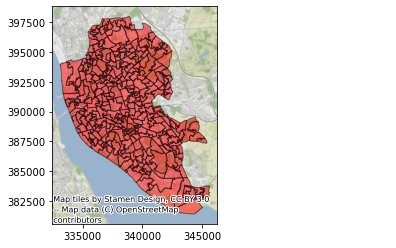

In [7]:
# Visualizamos la geometría
ax = ahah.plot(alpha=0.5, edgecolor='black',color ='red');
# Agregamos un mapa base, definiendo como CRS el CRS del dataframe para que este pueda ser reproyectado
ctx.add_basemap(ax, crs=ahah.crs)

In [4]:
# Creamos la matriz de pesos espaciales
%time w = weights.Queen.from_dataframe(ahah, idVariable="lsoa11cd")

Wall time: 1.36 s


In [5]:
# Estandarizamos la matriz por fila
%time w.transform = 'R'

Wall time: 0 ns


In [6]:
# Crea la versión estandarizada del valor AHAH
ahah['ahah_std'] = (ahah['ahah'] - ahah['ahah'].mean()) / ahah['ahah'].std()

In [7]:
# Crea el rezago espacial del valor AHAH
ahah['ahah_lag'] = weights.lag_spatial(w, ahah['ahah_std'])

In [8]:
# Visualizamos el dataframe
ahah.head()

,geometry,lsoa11cd,ahah,ahah_std,ahah_lag
lsoa11cd,,,,,
E01006512,"POLYGON ((336103.358 389628.580, 336103.416 38...",E01006512,26.870382,0.226898,0.708614
E01006513,"POLYGON ((335173.781 389691.538, 335169.798 38...",E01006513,46.542967,3.311056,1.505995
E01006514,"POLYGON ((335495.676 389697.267, 335495.444 38...",E01006514,38.256588,2.011963,1.004101
E01006515,"POLYGON ((334953.001 389029.000, 334951.000 38...",E01006515,27.819724,0.375731,1.531162
E01006518,"POLYGON ((335354.015 388601.947, 335354.000 38...",E01006518,28.315099,0.453393,0.051154


### 2. Autocorrelación espacial global
- Visualiza el valor principal AHAH con un gráfico de Moran
- Calcula la I. de Moran
¿Qué conclusiones puedes obtener a partir del grafico y dle valor de la I. de Moran? ¿ Cuál es el patrón espacial general?

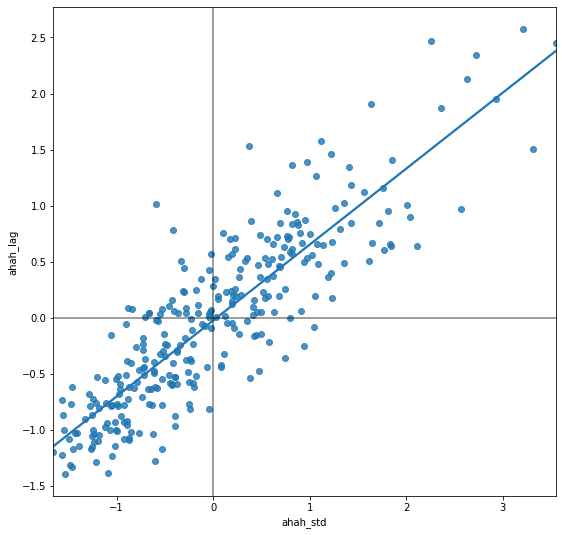

In [9]:
# Setup the figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot values
sns.regplot(x='ahah_std', y='ahah_lag', data=ahah, ci=None)
# Add vertical and horizontal lines
plt.axvline(0, c='k', alpha=0.5)
plt.axhline(0, c='k', alpha=0.5)
# Display
plt.show()

In [11]:
# Calculamos la I de Moran a partir de la variabla ahah y la matriz de pesos
mi = esda.Moran(ahah['ahah'], w)
print ("I de Moran: ")
print(mi.I)
print(f"P-value: {mi.p_sim}, or {mi.p_sim*100} percent.")

I de Moran: 
0.6770361378406533
P-value: 0.001, or 0.1 percent.


 ## Conclusiones
 A Partir del comportamiento de la gráfica podemos consluir que existe una clara concentración de valores similiares. esto debido a la distribución de los valores
 Hecho que se comprueba con el valor obtenido al calcular la I de Moran, la cual tiene una significancia del 0.1% Por lo que es muy poco que con un proceso aleatorio se obtenda una distribución de valores como la que se tiene.

# 3. Autocorrelación espacial local

- Calcula los estadiísticos LISa para las áreas LSOA
- Realiza un mapa de clusters significantes al 5%
- ¿Puedes indentificar hosposts o coldspots? Si es así, ¿Qué significan? ¿Qué pasa con los outliers espaciales?
- Crea un mapa de clusters con niveles de significancia del 1% y 10%; comparalos entre entre ellos. ¿Cuáles son los principales cambios? ¿Por qué?

In [12]:
# Calculamos los estadísticos LISA a partir de la variable y la matriz de pesos, guardamos estos en una variable los cuales pueden ser accesados
# https://pysal.org/esda/generated/esda.Moran_Local.html
lisa = esda.Moran_Local(ahah['ahah'], w)

# Guardamos los valores de la I de Moran en el dataframe
ahah['i_moran'] = lisa.Is

# Obtenemos los valores de significancia estadistica de cada una de las entidades
ahah['p_value'] = lisa.p_sim

# Guardamos el cuadrante en el el que se encuentra el valor de la I de Moran, 1 HH, 2 LH, 3 LL, 4 HL
ahah['quadrant'] = lisa.q

# Creamos una lista con los valores de los cuadrantes a corregir
quadrant = { 1:"HH", 
             2:"LH", 
             3:"LL", 
             4:"HL"} 
# Creamos una nueva columna en la que mapeamos los valores de acuerdo a la variable anterior
ahah["q_meaning"] = ahah["quadrant"].map(quadrant) 

# Visualizamos
ahah.head(10)

,geometry,lsoa11cd,ahah,ahah_std,ahah_lag,i_moran,p_value,quadrant,q_meaning
lsoa11cd,,,,,,,,,
E01006512,"POLYGON ((336103.358 389628.580, 336103.416 38...",E01006512,26.870382,0.226898,0.708614,0.160783,0.054,1,HH
E01006513,"POLYGON ((335173.781 389691.538, 335169.798 38...",E01006513,46.542967,3.311056,1.505995,4.986433,0.001,1,HH
E01006514,"POLYGON ((335495.676 389697.267, 335495.444 38...",E01006514,38.256588,2.011963,1.004101,2.020214,0.021,1,HH
E01006515,"POLYGON ((334953.001 389029.000, 334951.000 38...",E01006515,27.819724,0.375731,1.531162,0.575304,0.001,1,HH
E01006518,"POLYGON ((335354.015 388601.947, 335354.000 38...",E01006518,28.315099,0.453393,0.051154,0.023193,0.419,1,HH
E01006519,"POLYGON ((338007.944 385540.777, 338000.000 38...",E01006519,18.732202,-1.048960,-1.234225,1.294653,0.001,3,LL
E01006520,"POLYGON ((337024.098 388190.158, 337043.284 38...",E01006520,19.516733,-0.925966,-0.932375,0.863347,0.002,3,LL
E01006521,"POLYGON ((337519.025 386981.798, 337517.896 38...",E01006521,14.861336,-1.655813,-1.200844,1.988373,0.001,3,LL
E01006522,"POLYGON ((336962.058 387729.229, 336956.765 38...",E01006522,22.064641,-0.526519,-1.172713,0.617456,0.001,3,LL


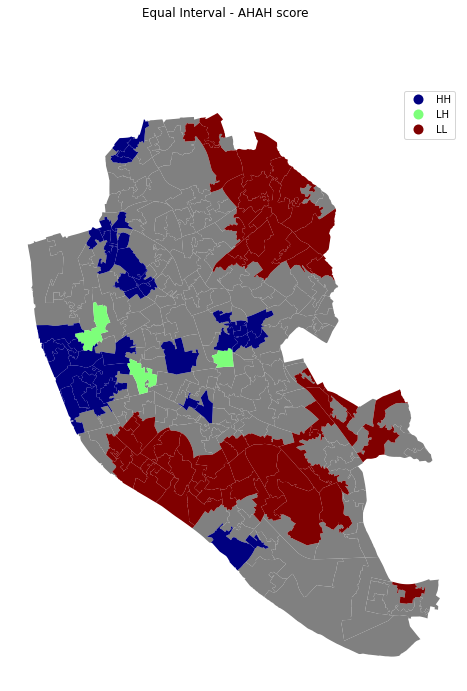

In [24]:
# Setup de la gráfica
f, ax = plt.subplots(1, figsize=(10, 11))
# Agregamos un titulo
f.suptitle("Equal Interval - AHAH score")

# Mostramos clusters sin significancia, es decir aquellos donde su p-value es mayor a 0.05
ns = ahah.loc[ahah['p_value']> 0.05, 'geometry']
ns.plot(ax=ax, color='grey')

# Mostramos y editamos la representación de los elementos a mapear
otros = ahah.loc[ahah['p_value']< 0.05]
otros.plot(column="q_meaning",
        cmap="jet",
        legend=True,
        ax=ax,) # donde se ubica la información

# Agregamos mapa base
# cx.add_basemap(ax, crs=liv.crs, source=cx.providers.Stamen.Watercolor);
#  Removemos los bordes
ax.set_axis_off()
# Visualizamos
plt.show()

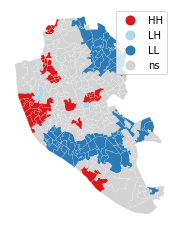

In [13]:
# Realiza un mapa de clusters significantes al 5%
lisa_cluster(lisa, ahah, p=0.05);

Como podemos apreciar, se tiene una fuerte presencia de coldspots en Liverpool, particularmente en la zona norte y la zona centro sur:
Mientras que los Hodspots tienen una extensión mucho más concentrada y contenida en la zona poniente de la ciudad

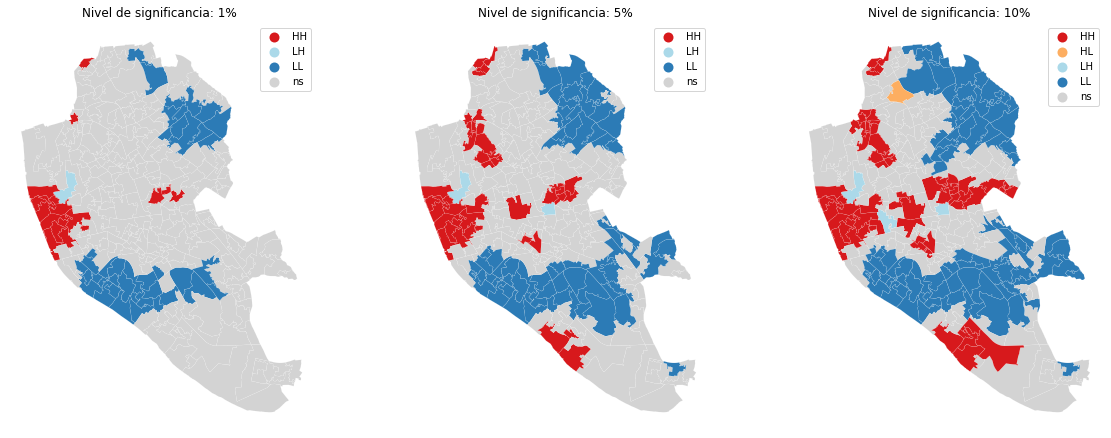

In [21]:
# Crea un mapa de clusters con niveles de significancia del 1% y 10%; comparalos entre entre ellos. ¿Cuáles son los principales cambios? ¿Por qué?
f, axs = plt.subplots(1, 3, figsize=(20, 7.5))
# 
lisa_cluster(lisa, ahah, p=0.01, ax=axs[0])
axs[0].set_title("Nivel de significancia: 1% ")
#
lisa_cluster(lisa, ahah, p=0.05, ax=axs[1])
axs[1].set_title("Nivel de significancia: 5%")
#
lisa_cluster(lisa, ahah, p=0.10, ax=axs[2])
axs[2].set_title("Nivel de significancia: 10%");

A Partir del mapeo de los estadísticos LISA con los distintos niveles de significancia podemos apreciar aquellas entidades que nacen de un proceso plenamente especial y no de un aleatorio.
En estos Hot y coldpost (HH y LL) sin duda alguna existen caracteristicas en concreto que permiten la concentración de valores